# External Validation of SWAST Forecasting Model
## Overall results summary.

This notebook generates the overall results summary for the MASE, and prediction intervals for LAS, YAS and WAST.

In [1]:
print('******************Summary of External validation results*****************\n\n')

******************Summary of External validation results*****************




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from os import listdir
from os.path import isfile, join

from scipy.stats import norm, t

sns.set(style="whitegrid")

In [3]:
cwd = os.getcwd()
cwd

'/home/tom/Documents/code/swast-benchmarking/results'

In [4]:
if cwd[-7:] != "results":
    mypath = './results/external_validation/'
    TABLE_PATH = './paper/tables/'
    FIGURE_PATH = './paper/figures/'
    APPENDIX_PATH = './paper/appendix/'
else:
    mypath = './external_validation/'
    TABLE_PATH = '../paper/tables/'
    FIGURE_PATH = '../paper/figures/'
    APPENDIX_PATH = '../paper/appendix/'

In [5]:
result_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(mypath) 
                for f in filenames if os.path.splitext(f)[1] == '.csv']

In [6]:
results_mean = pd.DataFrame()
results_med = pd.DataFrame()
results_mean_std = pd.DataFrame()
results_all = pd.DataFrame()

## Point Estimate Results

In [7]:
error_measures = ['smape', 'rmse', 'mase', 'coverage_80', 'coverage_95']

In [8]:
mypath

'./external_validation/'

In [9]:
#start = len('/external_validation/')
start = len(mypath) - 1
for metric in error_measures:
    to_read = [filename for filename in result_files if metric in filename]
    model_names = ['.' + name[start:name.index('_', start)] for name in to_read]
    
    for filename, model_name in zip(to_read, model_names):
        df = pd.read_csv(filename, index_col=0)
        if 'snaive' not in model_name:
            prefix = model_name + '_' + metric
            results_mean[prefix + '_mean'] = df.mean()
            results_mean[prefix  + '_std'] = df.std()
            results_med[prefix + '_med'] = df.median()
            results_med[prefix + '_iqr'] = df.quantile(0.75) - df.quantile(0.25)

            results_mean_std[prefix] = results_mean[prefix + '_mean'].map('{:,.2f}'.format) \
                + ' (' + results_mean[prefix  + '_std'].map('{:,.2f}'.format) + ')'
            
            if 'mase' in filename:
                results_all[prefix] = df.to_numpy().flatten()

## Seperate dataframes for prediction intervals

In [10]:
summary_fa = results_mean.filter(
    like="coverage_95").filter(like="fbp-arima").filter(like='mean')
summary_fa2 = results_mean.filter(
    like="coverage_80").filter(like="fbp-arima").filter(like='mean')

# Overall statistics

## Mean absolute scaled error


Overall External Evaluation Statistics for MASE
mean: 0.7275 95% CI (0.7193-0.7357)
median: 0.734, IQR 0.084
middle 90%: 0.641 - 0.834


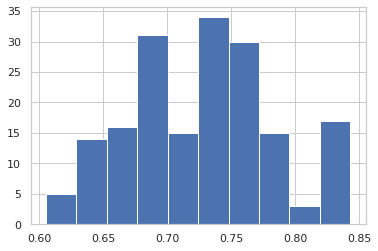

In [11]:
alpha = 0.05

#overall MASE
summary_fa = results_mean.filter(
    like="mase").filter(like="fbp-arima").filter(like='mean')

mean = summary_fa.to_numpy().flatten().mean()
print(f'\nOverall External Evaluation Statistics for MASE')

#sample std
std = summary_fa.to_numpy().flatten().std(ddof=1)

n = summary_fa.to_numpy().flatten().shape[0]

#Confidence interval calculation
se = std / np.sqrt(n)
z = np.abs(t.ppf(alpha / 2, n - 1))
hw = z * se
lower = mean - hw
upper = mean + hw

#lower and upper 95% CI
print(f'mean: {mean:.4f} 95% CI ({lower:.4f}-{upper:.4f})')

#median
med = np.percentile(summary_fa.to_numpy().flatten(), 50)
lq = np.percentile(summary_fa.to_numpy().flatten(), 25)
uq = np.percentile(summary_fa.to_numpy().flatten(), 75)
print(f'median: {med:.3f}, IQR {uq - lq:.3f}')


#middle 90% of data lies between
fifth = np.percentile(summary_fa.to_numpy().flatten(), 5)
ninetyfifth = np.percentile(summary_fa.to_numpy().flatten(), 95)
print(f'middle 90%: {fifth:.3f} - {ninetyfifth:.3f}')

plt.hist(summary_fa.to_numpy().flatten());

## 80% Prediction interval coverage


Overall External Evaluation Statistics for 80% PI coverage
mean: 0.8332 95% CI (0.8282-0.8381)
median: 0.837, IQR 0.051
middle 90%: 0.773 - 0.878


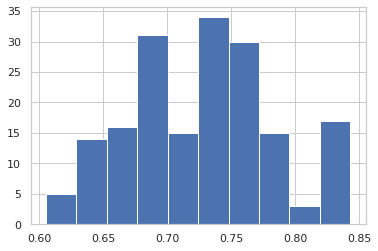

In [12]:
alpha = 0.05

#overall 80% PI coverage
mean = summary_fa2.to_numpy().flatten().mean()
print(f'\nOverall External Evaluation Statistics for 80% PI coverage')

#sample std
std = summary_fa2.to_numpy().flatten().std(ddof=1)

n = summary_fa2.to_numpy().flatten().shape[0]

#Confidence interval calculation
se = std / np.sqrt(n)
z = np.abs(t.ppf(alpha / 2, n - 1))
hw = z * se
lower = mean - hw
upper = mean + hw

#lower and upper 95% CI
print(f'mean: {mean:.4f} 95% CI ({lower:.4f}-{upper:.4f})')

#median
med = np.percentile(summary_fa2.to_numpy().flatten(), 50)
lq = np.percentile(summary_fa2.to_numpy().flatten(), 25)
uq = np.percentile(summary_fa2.to_numpy().flatten(), 75)
print(f'median: {med:.3f}, IQR {uq - lq:.3f}')


#middle 90% of data lies between
fifth = np.percentile(summary_fa2.to_numpy().flatten(), 5)
ninetyfifth = np.percentile(summary_fa2.to_numpy().flatten(), 95)
print(f'middle 90%: {fifth:.3f} - {ninetyfifth:.3f}')

plt.hist(summary_fa.to_numpy().flatten());

## 95% prediction interval coverage


Overall External Evaluation Statistics for 95% PI Coverage
mean: 0.9649 95% CI (0.9626-0.9671)
median: 0.970, IQR 0.019
middle 90%: 0.936 - 0.983


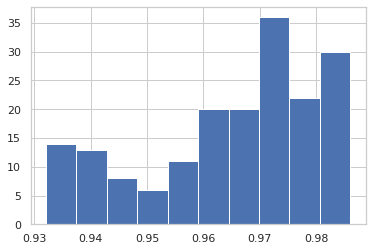

In [13]:
summary_fa = results_mean.filter(
    like="coverage_95").filter(like="fbp-arima").filter(like='mean')

mean = summary_fa.to_numpy().flatten().mean()
print(f'\nOverall External Evaluation Statistics for 95% PI Coverage')

#sample std
std = summary_fa.to_numpy().flatten().std(ddof=1)

n = summary_fa.to_numpy().flatten().shape[0]

#Confidence interval calculation
se = std / np.sqrt(n)
z = np.abs(t.ppf(alpha / 2, n - 1))
hw = z * se
lower = mean - hw
upper = mean + hw

#lower and upper 95% CI
print(f'mean: {mean:.4f} 95% CI ({lower:.4f}-{upper:.4f})')

#median
med = np.percentile(summary_fa.to_numpy().flatten(), 50)
lq = np.percentile(summary_fa.to_numpy().flatten(), 25)
uq = np.percentile(summary_fa.to_numpy().flatten(), 75)
print(f'median: {med:.3f}, IQR {uq - lq:.3f}')


#middle 90% of data lies between
fifth = np.percentile(summary_fa.to_numpy().flatten(), 5)
ninetyfifth = np.percentile(summary_fa.to_numpy().flatten(), 95)
print(f'middle 90%: {fifth:.3f} - {ninetyfifth:.3f}')

plt.hist(summary_fa.to_numpy().flatten());

## Overall Results Summary Table

In [14]:
#filter for mase - mean results
region_means = results_mean.filter(
    like="mase").filter(like='mean').filter(like='fbp-arima').mean().sort_index()

In [15]:
#filter for mase stdev
region_std = results_mean.filter(
    like="mase").filter(like='std').filter(like='fbp-arima').mean().sort_index()

In [16]:
#coverage mean
region_95_mean = results_mean.filter(like="coverage_95").filter(like='mean').filter(like='fbp-arima').mean().sort_index()
region_80_mean = results_mean.filter(like="coverage_80").filter(like='mean').filter(like='fbp-arima').mean().sort_index()

In [17]:
#coverage stdev
region_95_std = results_mean.filter(like="coverage_95").filter(like='std').filter(like='fbp-arima').mean().sort_index()
region_80_std = results_mean.filter(like="coverage_80").filter(like='std').filter(like='fbp-arima').mean().sort_index()

In [18]:
#create index of dataframe
comparisons = list(region_means.index)
idx = [i.replace('_mase_mean', '') for i in comparisons]

In [19]:
#construct table
df_regions = pd.DataFrame(region_means.to_numpy(), columns=['mean'])
df_regions['std'] = region_std.to_numpy()
df_regions['mean_80'] = region_80_mean.to_numpy()
df_regions['std_80'] = region_80_std.to_numpy()
df_regions['mean_95'] = region_95_mean.to_numpy()
df_regions['std_95'] = region_95_std.to_numpy()
df_regions['MASE'] = df_regions['mean'].map('{:,.2f}'.format) \
            + ' (' + df_regions['std'].map('{:,.2f}'.format) + ')'

df_regions['Coverage 80'] = df_regions['mean_80'].map('{:,.2f}'.format) \
            + ' (' + df_regions['std_80'].map('{:,.2f}'.format) + ')'

df_regions['Coverage 95'] = df_regions['mean_95'].map('{:,.2f}'.format) \
            + ' (' + df_regions['std_95'].map('{:,.2f}'.format) + ')'

df_regions.index = idx
df_regions = df_regions.drop(['mean', 'std', 'mean_80', 'std_80', 
                              'mean_95', 'std_95'], axis=1)

In [20]:
df_regions.shape

(15, 3)

In [21]:
#trim out trust and region intro seperate columns
df_regions['trust'] = [i[2:i.find('/', 2)] for i in list(df_regions.index)]
df_regions['region'] = [i[i.find('/', 2)+1:] for i in list(df_regions.index)]

In [22]:
#summary frame of results
print("**Table 5: External validation: Point forecast and coverage performance by region.")

df_regions['region'] = [str(i).replace('-fbp-arima', '') 
                        for i in list(df_regions.region)]

df_regions.index = pd.MultiIndex.from_frame(df_regions[['trust', 'region']])
df_regions.drop(['trust'], axis=1, inplace=True)
df_regions.drop(['region'], axis=1, inplace=True)

df_regions.drop(('york','Trust'), axis=0, inplace=True)
df_regions.drop(('wales','Trust'), axis=0, inplace=True)
df_regions

**Table 5: External validation: Point forecast and coverage performance by region.


MASE  Coverage 80  Coverage 95
trust  region                                                         
london North Central             0.76 (0.11)  0.84 (0.06)  0.94 (0.04)
       North East                0.74 (0.08)  0.87 (0.06)  0.97 (0.03)
       North West                0.75 (0.11)  0.86 (0.07)  0.97 (0.03)
       South East                0.70 (0.10)  0.85 (0.06)  0.98 (0.03)
       South West                0.68 (0.10)  0.86 (0.06)  0.97 (0.04)
wales  Control Central and West  0.69 (0.12)  0.82 (0.09)  0.96 (0.04)
       Control North             0.73 (0.14)  0.79 (0.10)  0.97 (0.04)
       Control South East        0.64 (0.10)  0.87 (0.06)  0.98 (0.04)
york   ABL                       0.67 (0.11)  0.86 (0.05)  0.98 (0.02)
       CKW                       0.74 (0.09)  0.82 (0.07)  0.96 (0.03)
       Humb and ER               0.77 (0.11)  0.79 (0.08)  0.94 (0.04)
       North Yorks               0.83 (0.15)  0.77 (0.09)  0.94 (0.06)
       South                     0.76 (0.11)  0.81 (0.08)  0.96 (0.04)

In [23]:
df_regions.sort_index().to_latex(f'{TABLE_PATH}Table5.tex')

In [24]:
print(df_regions)

                                        MASE  Coverage 80  Coverage 95
trust  region                                                         
london North Central             0.76 (0.11)  0.84 (0.06)  0.94 (0.04)
       North East                0.74 (0.08)  0.87 (0.06)  0.97 (0.03)
       North West                0.75 (0.11)  0.86 (0.07)  0.97 (0.03)
       South East                0.70 (0.10)  0.85 (0.06)  0.98 (0.03)
       South West                0.68 (0.10)  0.86 (0.06)  0.97 (0.04)
wales  Control Central and West  0.69 (0.12)  0.82 (0.09)  0.96 (0.04)
       Control North             0.73 (0.14)  0.79 (0.10)  0.97 (0.04)
       Control South East        0.64 (0.10)  0.87 (0.06)  0.98 (0.04)
york   ABL                       0.67 (0.11)  0.86 (0.05)  0.98 (0.02)
       CKW                       0.74 (0.09)  0.82 (0.07)  0.96 (0.03)
       Humb and ER               0.77 (0.11)  0.79 (0.08)  0.94 (0.04)
       North Yorks               0.83 (0.15)  0.77 (0.09)  0.94 (0.06)
      

# End